# ANALYSIS OF SPAIN DEMOGRAPHIC DATA - PART IV

## Introduction

This work aims to continue analyzing, via DASH, the demographic data of __INE - Instituto Nacional de Estadística de España__. This time we are going to use the library related to **PLOTLY DASH**.
The annoyance is that when you run the code, <u>the kernel is busy</u>, keeping the dashboard at the address $http://127.0.0.1:8050/$. The following figure gives this view:
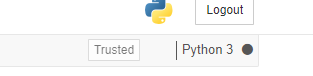

And this happens because after executing a code with dash, the following figure represents this kernel occupation, observing the result of the code execution, for a longer period, highlighting the one indicated by the arrow:

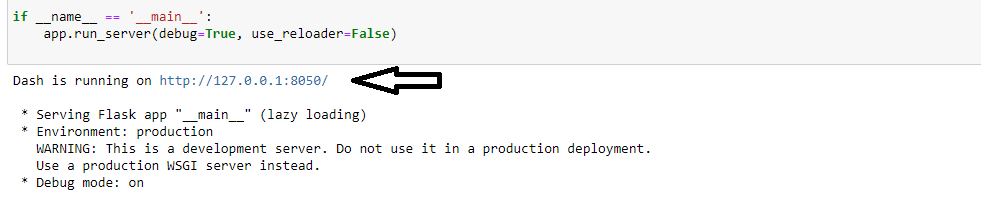


Thus, the kernel restart is used a lot, as in the figure below, to free the kernel:
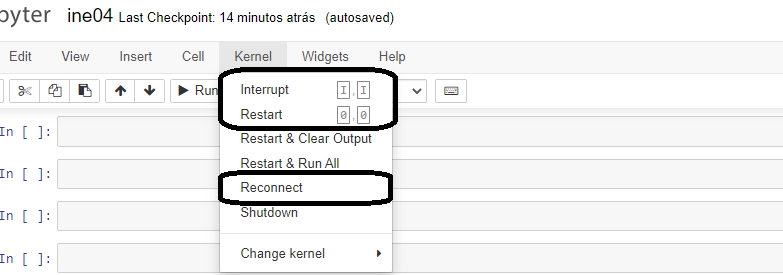

With these considerations in mind, let's take a look at some approaches to **dash**.
We are going to import some data already prepared previously and that need to be adapted for use in **dash**. Let's import the **dfs1241k.csv** and make adaptations for use in this jupyter notebook, and the result is the **dfz2b** dataframe:

In [1]:
# primeira parte

import pandas as pd
pd.options.mode.chained_assignment = None
dfk=pd.read_csv('dfs1241k.csv')

for s in range(len(dfk)):
    if dfk.iloc[s,4]  < 10:
        dfk.iloc[s,4]=str(dfk.iloc[s,4])
        dfk.iloc[s,4]='0'+dfk.iloc[s,4]
    elif dfk.iloc[s,4] >=10:
        dfk.iloc[s,4]=str(dfk.iloc[s,4])

dfz1=pd.read_csv('dfz.csv', low_memory=False,skiprows=[2,3])
dfz2=dfz1.iloc[0:54,:]
dfz2.columns=dfz2.iloc[0]
dfz2.drop([0], axis=0, inplace = True)
dfz2a = dfz2.iloc[:, ::-1]
dfz2a.reset_index(inplace = True)
pc = dfz2a.pop(' ')
dfz2a.insert(1, 'Provincias', pc)
dfz2a['Provincias'] = dfz2a['Provincias'].str.strip()
# segunda parte

li1=[]
qq1='01/'
qq2='07/'
dd=1971
cc=''
xx=0
for e in range(len(dfz2a.columns[2:105])):
    if xx < 103:
        cc=qq1+str(dd)
        li1.append(cc)
        cc=qq2+str(dd)
        li1.append(cc)
        xx=xx+2
    if xx == 103:
        cc=qq1+str(dd)
        li1.append(cc)
        xx=xx+1
    dd=dd + 1
li1.pop(103)

# terceira parte
b=2

for p in range(len(dfz2a.columns[2:105])):
    if b >=2 and b < 106:
        a=dfz2a.columns[b]
        dfz2a.rename(columns={a:li1[p]}, inplace=True)
        b = b + 1
dfz2a.columns   

# quarta parte

ba = 0
bb = 0
bc = 0
bd = 0

idx=1
for q in range(len(dfz2a.iloc[1:54,1])):
    if q > 0:
        ba = (dfz2a.iloc[q,1])
        bb = ba[0:2]
        bc = dfk[dfk['Código'].str.contains(bb)]
        bd = bc['Provincia'].values
        
        dfz2a.iloc[q,1] = bd
q = q + 1
ba = (dfz2a.iloc[q,1])
bb = ba[0:2]
bc = dfk[dfk['Código'].str.contains(bb)]
bd = bc['Provincia'].values
        
dfz2a.iloc[q,1] = bd
dfz2b = dfz2a.iloc[1:53,:] 
dfz2b.reset_index(drop=True, inplace = True)
dfz2b.to_csv('dfz2b.csv')

dfz2b.head()



,index,Provincias,01/1971,07/1971,01/1972,07/1972,01/1973,07/1973,01/1974,07/1974,...,01/2018,07/2018,01/2019,07/2019,01/2020,07/2020,01/2021,07/2021,01/2022,0
0,2,Albacete,340709,340750,340896,340941,341184,341191,341223,341120,...,390337,389322,389528,389648,389874,389027,388880,387990,387735,4
1,3,Alicante / Alacant,921985,932507,943452,954254,965894,977012,988791,999864,...,1845470,1848500,1862780,1873586,1885559,1889768,1895192,1897979,1904362,5
2,4,Almería,377637,379087,380880,382386,384280,385658,387553,388759,...,701069,701831,706871,710902,715665,717143,720861,720486,723899,6
3,5,Álava,199776,202665,205372,208303,211227,214139,217047,220074,...,325739,326419,327682,328574,329873,330157,329758,329171,329856,7
4,6,Asturias,1052039,1055764,1060233,1064504,1069075,1072722,1077057,1080982,...,1027624,1024192,1022205,1020039,1018899,1015454,1012889,1008898,1006193,8


With the **dfz2b** dataframe ready, let's adapt it for use in **dash**, generating **dfz2c**. The basic idea is to place the rows referring to the years, in columns.

In [2]:
import pandas as pd
pp=[]
pp1=[]
pp2=[]
po1=[]
po2=[]
aa1=[]
aa2=[]
for x in range(len(dfz2b)):
    ww = dfz2b.iloc[x,1]
    pp.append(ww)
    pp1=pp*103
    pp=[]
    pp2.extend(pp1)

for c in range(len(dfz2b)):
    po1=dfz2b.iloc[c,2:105].tolist()
    dfz2bb=dfz2b.iloc[c,2:105]
    po2.extend(po1)
    aa1=dfz2bb.index.values.tolist()
    aa2.extend(aa1)

#print(len(pp2),len(po2),len(aa2)) 
dictp={'PROVINCIA':pp2,'ANO':aa2,'POPULAÇÃO':po2}
dfz2c=pd.DataFrame(dictp)
dfz2c.to_csv('dfz2c.csv')
dfz2c.head()

,PROVINCIA,ANO,POPULAÇÃO
0,Albacete,01/1971,340709
1,Albacete,07/1971,340750
2,Albacete,01/1972,340896
3,Albacete,07/1972,340941
4,Albacete,01/1973,341184


To prepare the first 'dash', which will show the population by Autonomous Communities, through the bar graph, and which is simpler, we will base ourselves on the dataframe generated previously and saved with the name **dfs1240dd** and properly exported as **dfs1240dd.csv**. The figure summarizes its format:
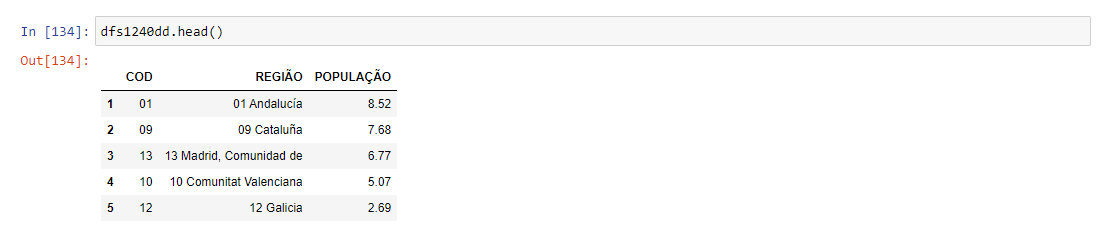

In [3]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

dfdd = pd.read_csv('dfs1240dd.csv')


app = Dash(__name__)
colors = {
    'background': '#efff7f',
    'text': '#111111'
}


df = dfdd

fig = px.bar(df, x="REGIÃO", y="POPULAÇÃO", color="POPULAÇÃO",height=700)

fig.update_layout(
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text']
)

app.layout = html.Div(children=[
    html.H1(children='QUANTIDADE DE HABITANTES POR COMUNIDADES AUTÔNOMAS'),

    html.Div(children='''
        Os dados populacionais são de 2021 (Valores x 1 Milhão).
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run(host='127.0.0.1',port='8010',debug=True, use_reloader=False)


Dash is running on http://127.0.0.1:8010/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


Now we are going to create a more complex 'dash' that implies using a dropdown to select a province and show population data for the period from 1971 to 2022. For this we will use **dfz2c.csv**, created at the beginning of this jupyter notebook. Even giving the "restart" to terminate the previous code that may be occupying the kernel, it is not necessary to execute the **dfz2c** dataframe generation again, as it is already stored in the form of **dfz2c.csv** .

In [4]:
# Import libraries
from dash import Dash, html, dcc, Input, Output
import pandas as pd
import plotly.express as px
# Load the dataset
provincias = pd.read_csv('dfz2c.csv')
# Create the Dash app
app = Dash()
# Set up the app layout
prov_dropdown = dcc.Dropdown(options=provincias['PROVINCIA'].unique(),
                            value='Albacete',
                            style={'width': '50%'})

app.layout = html.Div(children=[
    html.H1(children='EVOLUÇÃO DA POPULAÇÃO NAS PROVÍNCIAS DA ESPANHA (1971-2022)'),
    prov_dropdown,
    dcc.Graph(id='pop-graph')
])
# Set up the callback function
@app.callback(
    Output(component_id='pop-graph', component_property='figure'),
    Input(component_id=prov_dropdown, component_property='value')
)
def update_graph(select_provincia):
    filtered_provincias = provincias[provincias['PROVINCIA'] == select_provincia]
    line_fig = px.line(filtered_provincias,
                       x='ANO', y='POPULAÇÃO',
                       color='PROVINCIA',
                       title=f'Evolução da População em {select_provincia}')
    return line_fig

# Run local server
if __name__ == '__main__':
    app.run(host='127.0.0.1',port='8010',debug=True, use_reloader=False)


Dash is running on http://127.0.0.1:8010/

Dash is running on http://127.0.0.1:8010/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


## Conclusions:

In this jupyter notebook, I explored the use of **Plotly Dash** that offers a very suitable visual treatment for presentations on a certain topic, through an http. It is good, as it makes it possible, through python codes, to provide some information in a language that is well understood by the other stakeholders involved and decision makers.
The only drawback is the need to run a restart to free the kernel, as I'm using jupyter notebook and I chose not to use **jupyter-dash**.
Anyway, it is clear that it is an interesting subject to develop a learning about Data Science solutions.

## Final considerations:

I was a technician for 15 years and then an engineer for 30 years. Today I am 68 years old and I am retired. I took several free courses on the **EDX** website, which I highly recommend.

**EDX** is an American provider of open online courses created by Harvard and MIT. It hosts university-level online courses in a wide range of disciplines for a worldwide student body, including some free courses, which I've had the opportunity to take. A big part of my learning about Python and its libraries I got there.

For the sake of convenience and with a pedagogical sense, I chose to use the jupyter notebook, inside the Anaconda package, all for free!!

To use any programming language, it is necessary to know the basic principles of flowcharts, If, For, While, variables, in short, a set that serves any program. However, on a daily basis, there are many doubts about the use of the codes that I managed to get on several sites that were the answer in my browser search. I can highlight $https://stackoverflow.com$, and $https://github.com$, among many others. In short, all my doubts I took on the Internet!!!!

Therefore, there is no lack of information to learn, and for free!!! Enjoy!! And remember! I didn't spend a cent of dollar to learn Python!!!!

And remember that to learn python, all you need is willpower.